# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_03_001
## Гістограма зображення

### Розтягування гістограми

In [3]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [4]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Flower_1.png' 
test_im = io.imread(path + filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (1181, 787, 3) IMAGE SIZE 2788341
ROWS NUMBER 1181 CLMS NUMBER 787 PIX NUMBER 929447 Bins 256


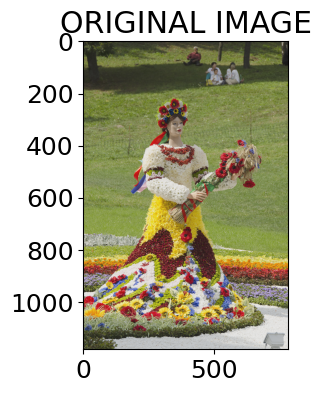

In [8]:
## Вивід оррігінального зображення на екран
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

#### Формування напівтонового зображення

Gray_Im SAPE (1181, 787, 3) Gray_Im SIZE 929447
Intensity MIN =  23 Intensity MAX =  234


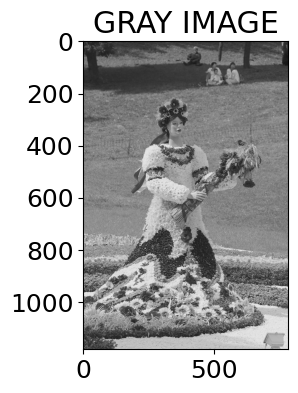

In [9]:
gray_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        gray_im [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]        

## L_Min, L_Max 
L_min = np.amin(gray_im [:,:,0])   
L_max = np.amax(gray_im [:,:,0])      
print ('Intensity MIN = ', L_min , 'Intensity MAX = ', L_max)
        
## Серое на экран
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('GRAY IMAGE')
plt.imshow(gray_im)
plt.show()

#### Побудова гістограми

Gray_Im SAPE (1181, 787, 3) Gray_Im SIZE 929447
L_Gisto SHAPE (256,) L_Gisto SIZE 256
Gisto MIN =  0 Gisto MAX =  14106


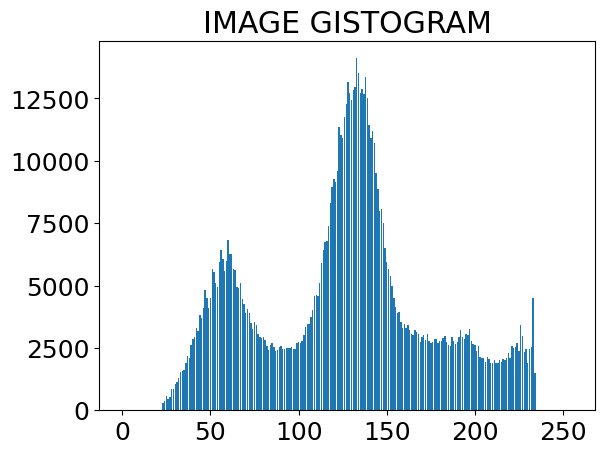

In [10]:
## Визначення масиву для гістограми
L_gisto = np.zeros (bins, dtype=np.uint32)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)
print ('L_Gisto SHAPE', L_gisto.shape, 'L_Gisto SIZE', L_gisto.size)

## Формування гістограми
for i in  range (rows_num):
    for j in  range (clms_num):
        L_gisto[gray_im [i, j, 0]] += 1 
        
## MIN, MAX гістограми
L_gisto_min = np.amin(L_gisto)        
L_gisto_max = np.amax(L_gisto)        
print ('Gisto MIN = ',L_gisto_min , 'Gisto MAX = ', L_gisto_max )


pix_index = np.arange(256) 

fig, ax = plt.subplots()
ax.bar(pix_index, L_gisto)
ax.set_title('IMAGE GISTOGRAM')
plt.show()        


Iensity MIN =  0 Itensity MAX =  255


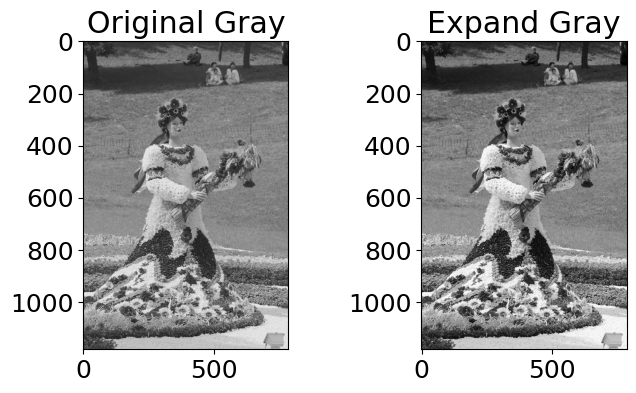

In [12]:
## Формування зображення з розтягнутою гістограмою
expand_image = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)  
koef = 255 / (L_max - L_min)

for i in  range (rows_num):
    
    for j in  range (clms_num):
        # Expand image
        expand_image [i, j, : ] = koef * (gray_im [i, j, 0] - L_min)  

## Bin_Min, Bin_Max 
Ex_L_min = np.amin(expand_image [:,:,0])   
Ex_L_max = np.amax(expand_image [:,:,0])      
print ('Iensity MIN = ', Ex_L_min , 'Itensity MAX = ', Ex_L_max)

        
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(gray_im)
ax[0].set_title("Original Gray")
ax[1].imshow(expand_image)
ax[1].set_title("Expand Gray")
plt.show()

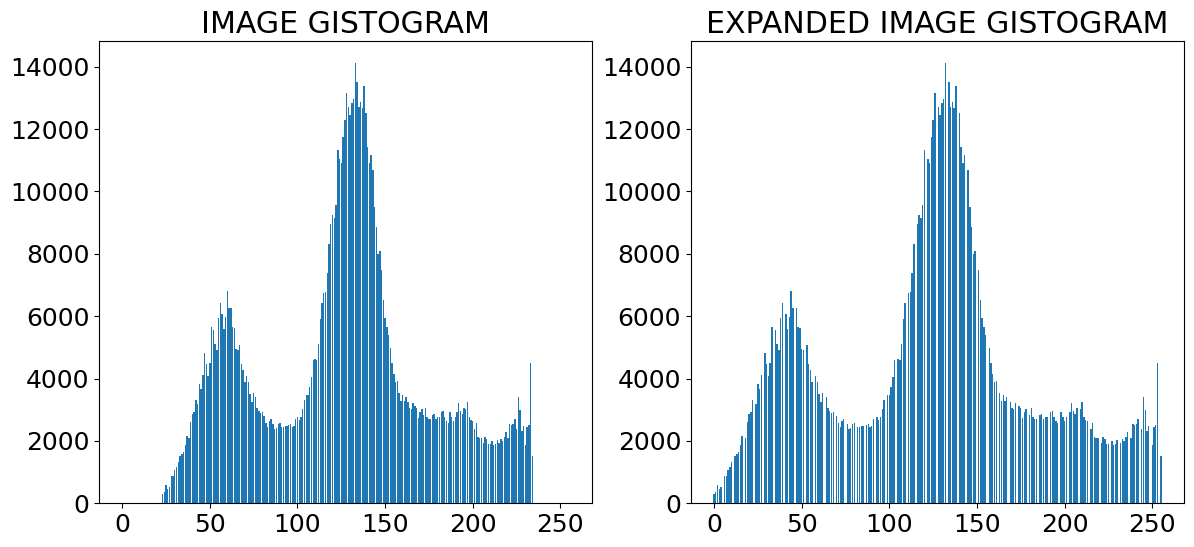

In [13]:
## Визначення масиву для нової гістограми
L_gisto_expand = np.zeros ( (bins), dtype=np.uint32)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        L_gisto_expand[expand_image [i, j, 0]] += 1 

pix_index = np.arange(256) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax = axs[0]
ax.bar(pix_index, L_gisto)
ax.set_title('IMAGE GISTOGRAM')
ax = axs[1]
ax.bar(pix_index, L_gisto_expand)
ax.set_title('EXPANDED IMAGE GISTOGRAM')
plt.show()        